In [1]:
#requirement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager
import math

In [2]:
# due to the design, we set the right side ytickLabel
plt.rcParams['ytick.labelright']  = True

In [3]:
#match dynamics - xg development during the match

#after collecting the match data (web scraping), we grouped them as follows

# time of shot (team1) ->         [ 0., 15., 22., 24., 45., 45., 52.]
# xG of shot (team1) ->             [0.  , 0.03, 0.21, 0.11, 0.17, 0.2 , 0.09]
# time of shot (team2) ->         [ 0.,  9., 18., 29., 29., 29., 32., 46., 47., 51., 51., 53., 55., 55., 57., 59., 69., 71., 78., 85., 89., 90.]
# xG of shot (team2) ->             [0.  , 0.02, 0.02, 0.03, 0.05, 0.1 , 0.42, 0.06, 0.34, 0.02, 0.38, 0.02, 0.01, 0.31, 0.03, 0.13, 0.17, 0.05, 0.04, 0.12, 0.01, 0.02]
 
# time of Goals ->          [45.0, 24.0, 85.0]
# team1 ->                       'Tiszakecskei LC'
# team2 ->                      'Szentlorinc SE'
# goal (team1)    ->                       2
# goal (team2).  ->                        1
# match date ->                '2022-11-09,
# number of shots (team1)   ->   6
# number of shots (team2)  ->   21

In [5]:
timeT1  =  [0,15,22,24,45,45,52]
xgT1 = [0.,0.03,0.21,0.11,0.17,0.2,0.09]
timeT2 = [0,9,18,29,29,29,32,46,47., 51., 51., 53., 55., 55., 57., 59., 69., 71., 78., 85., 89., 90.]
xgT2 =[0.,0.02,0.02,0.03,0.05, 0.1 , 0.42, 0.06, 0.34, 0.02, 0.38, 0.02, 0.01, 0.31, 0.03, 0.13, 0.17, 0.05, 0.04, 0.12, 0.01, 0.02]
timeG = [45.0,24.0,85.0]
t1 =                      'Tiszakecskei LC'
t2 =                      'Szentlorinc SE'
gT1    =                       2
gT2  =                        1
date =                '2022-11-09'
numShT1   =   6
numShT2  =   21

In [6]:
# we set the colors for the teams as you like
the_teams_colors = {
'Kozármisleny': ['#376592','#fafafa'],
'MTK':['#3aace4','#e4edf3'],
'Kazincbarcika': ['#d1d3d4','#034694'],
'Gyirmót': ['#107cc6','#f9d925'],
'III. Kerületi': ['blue', 'w'],
 'Békéscsaba': ['#6b3a77', '#faf8f8'],
 'Nyíregyháza': ['#e70b10', '#315183'],
 'Győr': ['#29765e', '#f3f4f1'],
 'Szolnok': ['b', 'w'],
 'Kecskemét': ['slateblue', 'w'],
 'Siófok': ['#e9c728', '#3a69a4'],
 'Vasas': ['r', 'b'],
 'Csákvár': ['#d89f41', '#28427c'],
 'Pécs': ['#df2528', '#090909'],
 'Ajka': ['#086807', '#aacbaa'],
 'Budaörs': ['g', 'w'],
 'Szentlőrinc': ['#c50503', '#0a0a0b'],
 'Haladás': ['#146840', '#f3f3ee'],
 'Tiszakécske': ['#1238aa', '#f1d124'],
 'Dorogi': ['#f01e0e', '#0c0b0b'],
 'Szeged': ['#496282', '#0a0a0b'],
 'Budafok': ['#eb2729', '#0e0c0c'],
 'Diósgyőr': ['#c91701', '#fcfbf7'],
 'Soroksár': ['#ede411', '#0d0d0b'],
'MTE 1904': ['#cde2ef','#090909'  ]}

In [7]:
# teamnames matching - so that scratched names don't cause trouble (unfortunately it's manual)
teams_names = ['Kozármisleny','MTK','Kazincbarcika','Gyirmót','III. Kerületi TVE','Békéscsaba 1912 Előre','Nyíregyháza Spartacus','ETO FC Győr','Szolnoki MÁV FC',
 'Kecskeméti TE','BFC Siófok','Vasas FC','Csákvár','Pécsi MFC','FC Ajka','Budaörs','Szentlőrinc SE','Szombathelyi Haladás',
 'Tiszakécske','Dorogi FC','Szeged-Csanád Grosics Akadémia','Budafoki MTE','Diósgyőri VTK','Soroksár SC','MTE 1904']

scrape_names = ['Kazincbarcika','Kozarmisleny','MTK','Gyirmot','III. Kerületi TVE','Bekescsaba','Nyiregyhaza Spartacus','Gyori ETO','Szolnok','Kecső','Siofok','Vasas','Csakvari TK','Pecsi MFC','Ajka','Budaörs','Szentlorinc SE',
       'Szombathelyi Haladas','Tiszakecskei LC','Dorogi','Szeged-Csanad','Budafoki MTE','Diosgyor','Soroksar SC','MTE 1904']

In [8]:
# create a df to record the names and their corresponding colors
df_color = pd.DataFrame({'inNév':scrape_names,'teamNév':teams_names,'colorH':[x[1][0] for x in the_teams_colors.items()], 'colorA':[x[1][1] for x in the_teams_colors.items()]})

In [9]:
# write a function to access the colors associated with the teamnames
def makeColor(a,b):
    hC = df_color[df_color.inNév ==  a].colorH.values[0]
    aC = df_color[df_color.inNév ==  b].colorH.values[0]
    teamColors = [hC,aC]
    return teamColors

In [12]:
def plotxG(timeT1,xgT1,timeT2,xGT2,timeG,t1,t2,gT1,gT2,date,numShT1,numShT2):
    
    # organize the data - according to home and away team
    
    home = {k:v for k,v in zip(timeT1,xgT1)}
    h_sign = ['home' for x in range(len(home))]
    d1 = pd.DataFrame({'perc':home.keys(), 'xg':home.values(), 'h_s':h_sign})

    away = {k:(v*-1) for k,v in zip(timeT2,xgT2)}
    a_sign = ['away' for x in range(len(away))]
    d2 = pd.DataFrame({'perc':away.keys(), 'xg':away.values(), 'h_s':a_sign})

    merge_g_xg = {**home,**away}
    
    df = pd.concat([d1,d2])
    df = df.sort_values(by='perc')
    
    #-----------------------------------------------------------
    
    # we set the default values (viz)
    
    colorFace = '#f6f2ee'
    fig, ax = plt.subplots(1, figsize=(16,8), facecolor=colorFace)
    ax.set_facecolor(colorFace)
    ax.set_axisbelow(True)
    
    ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
    ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.3)
    
    hz = ['top','right','left','bottom']
    for c in hz:
        plt.gca().spines[c].set_visible(False)

    # now we have chosen a different method of changing fonts
    
    font_path = '/Users/arpadambrusz/Desktop/jupyter_work/fonts/Canonatia.ttf'
    font_path2 = '/Users/arpadambrusz/Desktop/jupyter_work/fonts/Rajdhani/Rajdhani-Medium.ttf'
    
    prop = matplotlib.font_manager.FontProperties(fname=font_path, size=14)
    prop2 = matplotlib.font_manager.FontProperties(fname=font_path2, size=14)
    
   
   # set the title and subtitle 

    plt.suptitle(f'{t1.upper()} - {t2.upper()}    {gT1}:{gT2}', x=0.0539, y=0.93, ha='left', fontsize=25, fontproperties=prop2)
    plt.title(f'{date}', loc='left', fontsize=13, fontproperties=prop2),
    
    # set the color of the teams - using the function written
    c = makeColor(t1,t2)
    
    # --------------------------------
    # data - xG according to minutes and teams

    xq = df.perc
    xw = df.xg

    # we fill in the important areas with colors
    plt.fill_between(xq, xw,  where=xw >= 0,facecolor=c[0], interpolate=True, alpha=0.5)
    plt.fill_between(xq, xw, where=xw < 0, facecolor=c[1], interpolate=True, alpha=0.5)

    
    # display goals separately
    if len(timeG) != 0:
        plt.scatter(timeG[0], df[df.perc == timeG[0]].xg.values[0], color='k', marker='*', alpha=0.5, label = 'Goal')
    
        for goal in timeG:
            plt.scatter(goal, df[df.perc == goal].xg.values[0], color='k', marker='*', alpha=0.5)

            if df[df.perc == goal].xg.values[0] >0:
                plt.annotate(f' {df[df.perc == goal].xg.values[0]} xG', (goal-2, df[df.perc == goal].xg.values[0]+0.11
                                                                      ),size=11, color='k',fontproperties=prop2,alpha=0.7,zorder=2)
            if df[df.perc == goal].xg.values[0] <0:
                plt.annotate(f' {df[df.perc == goal].xg.values[0]*-1} xG', (goal-2, df[df.perc == goal].xg.values[0]-0.19
                                                                         ),size=11, color='k',fontproperties=prop2,alpha=0.7,zorder=2)

    
    # now the cumulative xg line defining the label
    plt.plot(timeT1,np.cumsum(xgT1), color=c[0], alpha=0.3,label=f'{t1}  [{round(np.cumsum(xgT1)[-1],2)} xG / {len(timeT1)-1} shots]' ,zorder=0)
    plt.plot(timeT2,np.cumsum(xgT2)*-1, color=c[1], alpha=0.3,label = f'{t2} [{round(np.cumsum(xgT2)[-1],2)} xG / {len(timeT2)-1} shots]',zorder=0)

    
    # writing out the final xg value, determining the position
    plt.annotate(f" {round(np.cumsum(xgT1)[-1],2)} xG", (timeT1[-1]+1,np.cumsum(xgT1)[-1]),size=11, color='k',
                 fontproperties=prop2, fontweight = 'bold', zorder=2)
    plt.annotate(f' {round(np.cumsum(xgT2)[-1],2):.2f} xG', (timeT2[-1]+1,np.cumsum(xgT2)[-1]*-1),size=11, color='k',
                 fontproperties=prop2, fontweight='bold',zorder=2)


    plt.scatter(timeT1[-1],np.cumsum(xgT1)[-1], c = c[0],alpha=0.7)
    plt.scatter(timeT2[-1],np.cumsum(xgT2)[-1]*-1, c = c[1],alpha=0.7)

    # halftime span
    plt.axvspan(45, 94, alpha=0.05, color='grey') 
    
    # defining the ticks values
    if max(timeT1)<max(timeT2):
        he = max(timeT2)
    else:
        he = max(timeT1)

    if np.cumsum(xgT1)[-1]>np.cumsum(xgT2)[-1]:
        lp = math.ceil(np.cumsum(xgT2)[-1])
    else:
        lp= math.ceil(np.cumsum(xgT2)[-1])

    plt.xticks(np.arange(0,he+5,5));
    plt.yticks(np.arange(-lp,lp+0.5,0.5),label='');

    
    # smaill decoration
    fig.text(0.05,0.1,"Data provided by InStat   /ambrusz/" , fontproperties=prop, size= 40, fontstyle='italic')
    plt.legend(frameon=False, bbox_to_anchor =(0.96, 1.1), ncol = 3)
    ax.set_xlabel('Minute',  size=15)
    ax.set_ylabel('xG', size=15,)
    plt.tight_layout()
    
    #plt.savefig(f'/Users/arpadambrusz/Desktop/xg_match_2022_23/2_{md}_{z}-{u}.png', dpi=300, bbox_inches="tight")

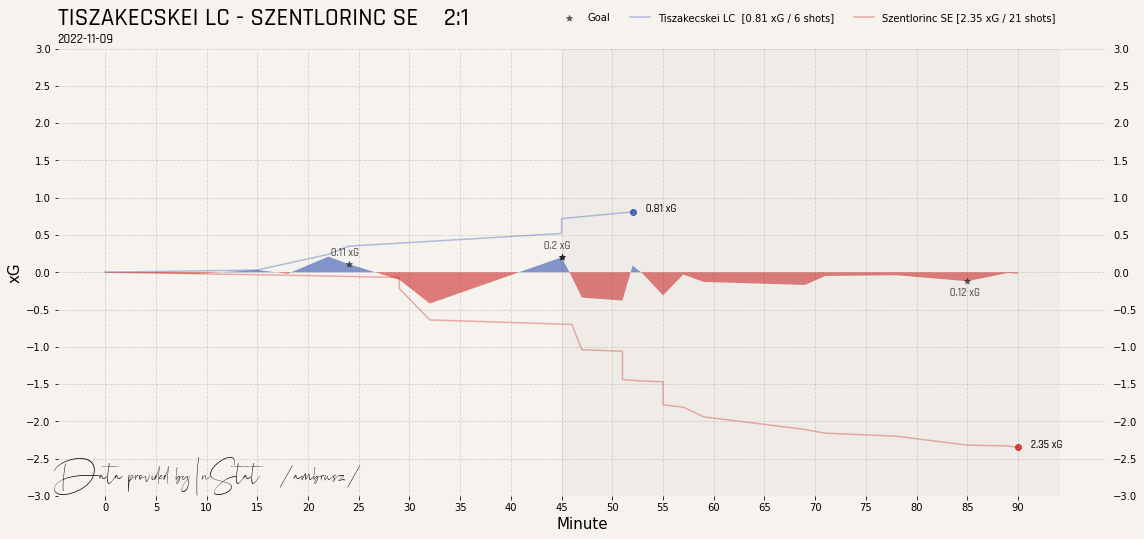

In [13]:
plotxG(timeT1,xgT1,timeT2,xgT2,timeG,t1,t2,gT1,gT2,date,numShT1,numShT2)